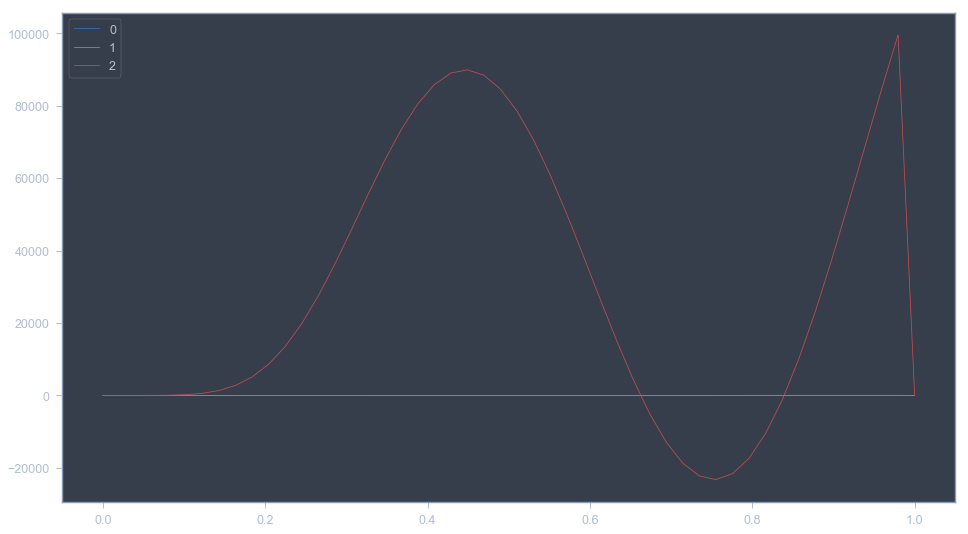

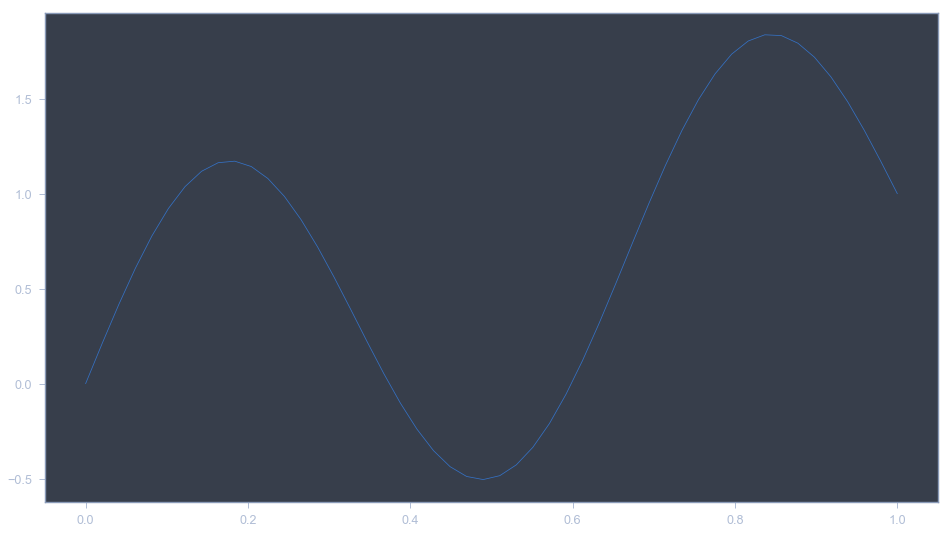

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

L= 1
N= 50
dt= 0.0001
dx= L/N

def FTCS(u, start, dt, dx):
    """u[time][space]"""
    u[0]= start
    for i in range(1,u.shape[0]):
        for k in range(1,u.shape[1]-1):
            a= u[i][k+1]
            b= u[i][k-1]
            u[i][k]= u[i-1][k]+dt/dx**2*(a+b-2*u[i][k])
    return None
n=10*5**2
tn= n*dt
u=np.empty((n,N))
u[:,0]= np.zeros(n)
u[:,N-1]= np.ones(n)
X=np.linspace(0,L,N)
start= np.sin(3*np.pi*X/L)+X/L
FTCS(u,start,dt,dx)
plt.figure(0,figsize=[16,9])
for i in range(0,3):
    plt.plot(X, u[10*i**2], label=str(i))
plt.legend()
plt.figure(1, figsize=[16,9])
plt.plot(X,start)

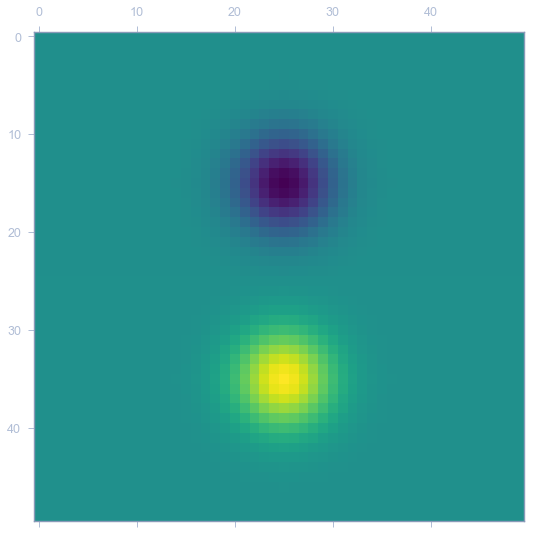

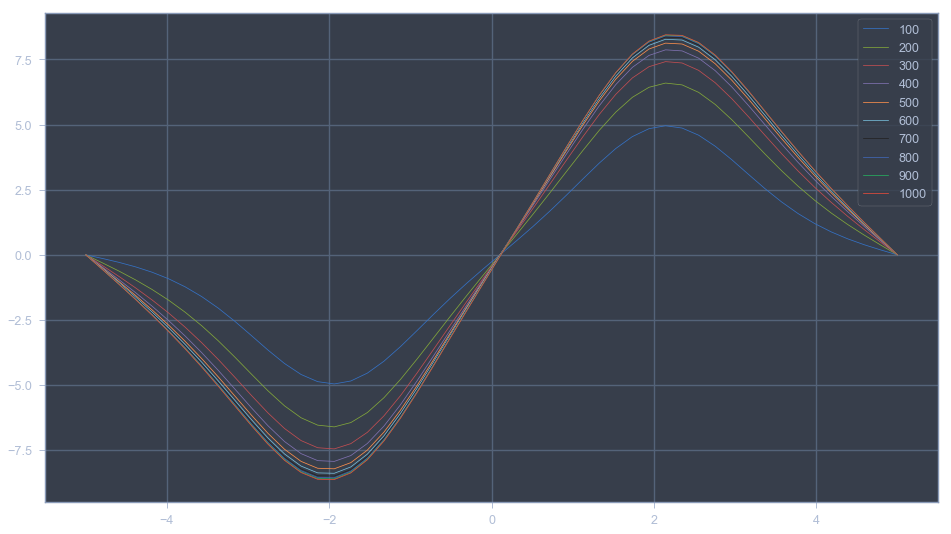

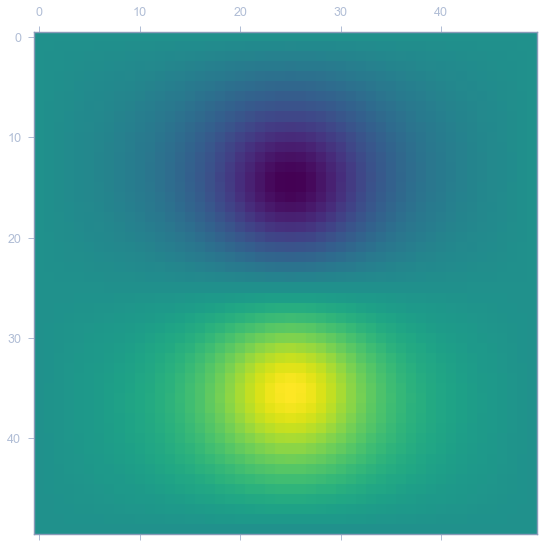

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N=50
cLim= [-5,5]

def relaxationSolve(u, start, dx, dy, rho):
    """u[k][x][y]"""
    u[0]=start
    for k in range(1, u.shape[0]):
        for i in range(1,u.shape[1]-1):
            for j in range(1, u.shape[2]-1):
                a= u[k-1, i+1, j]
                c= u[k-1, i-1, j]
                b= u[k-1, i, j+1]
                d= u[k-1, i, j-1]
                u[k, i, j]= np.pi*dx*dy*rho[i,j]+(a+b+c+d)/4
            

def roh(c0, ds, N):
    r= np.empty((N,N))
    for x in range(0,N):
        X=c0+x*ds
        for y in range(0,N):
            Y=c0+y*ds
            r[x,y]=np.exp(-(X-2)**2)*np.exp(-Y**2)-np.exp(-(X+2)**2)*np.exp(-Y**2)
    return r

plt.figure(0, figsize=[9,9])
ds= (cLim[1]-cLim[0])/N
R= roh(cLim[0],ds, N )
plt.matshow(R, fignum=0)

plt.figure(1, figsize=[16,9])
u= np.zeros((1001, 50, 50))
relaxationSolve(u, np.zeros((50,50)), ds, ds, R)
X= np.linspace(-5,5,50)
for i in range(1,11):
    plt.plot(X, u[i*100,:,24], label=str(i*100))
plt.legend()
plt.grid()

plt.figure(2, figsize=[9,9])
plt.matshow(u[1000], fignum=2)